In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# function to compute the power of an image, ither RGb or graylevel
def am_power(a):
    dim1 = a.shape
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    else:
        sz = dim1[0] * dim1[1] * dim1[2]
    pa = np.sum( np.double(a)**2 )
    pa = pa / sz
    return pa 

In [3]:
def ready_2_show(a, level=255):
    a = ( a - np.min(a) ) / (np.max(a) - np.min(a)) 
    a = a * level
    return np.uint8(a)


In [4]:
image = cv2.imread('..\\IMG_0054_1024.bmp' , 0)

### L3 = (1,2,1) - Level detection, E3 = (-1,0,1)- Edge detection, and S3 = (-1,2,-1)- Spot detection.

In [5]:
L3 = np.array([1,2,1]) / 4
E3 = np.array([-1,0,1])
S3 = np.array([-1,2,-1])
llist = [L3 , E3 , S3]

In [6]:
laws = []
for xs in llist:
    for ys in llist:
        xs= np.reshape(xs,(3,1))
        ys = np.reshape(ys,(1,3))
        L3L3 = np.matmul(xs,ys)  
        print(L3L3)
        laws.append(L3L3)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
[[-0.25  0.    0.25]
 [-0.5   0.    0.5 ]
 [-0.25  0.    0.25]]
[[-0.25  0.5  -0.25]
 [-0.5   1.   -0.5 ]
 [-0.25  0.5  -0.25]]
[[-0.25 -0.5  -0.25]
 [ 0.    0.    0.  ]
 [ 0.25  0.5   0.25]]
[[ 1  0 -1]
 [ 0  0  0]
 [-1  0  1]]
[[ 1 -2  1]
 [ 0  0  0]
 [-1  2 -1]]
[[-0.25 -0.5  -0.25]
 [ 0.5   1.    0.5 ]
 [-0.25 -0.5  -0.25]]
[[ 1  0 -1]
 [-2  0  2]
 [ 1  0 -1]]
[[ 1 -2  1]
 [-2  4 -2]
 [ 1 -2  1]]


In [7]:
laws

[array([[0.0625, 0.125 , 0.0625],
        [0.125 , 0.25  , 0.125 ],
        [0.0625, 0.125 , 0.0625]]),
 array([[-0.25,  0.  ,  0.25],
        [-0.5 ,  0.  ,  0.5 ],
        [-0.25,  0.  ,  0.25]]),
 array([[-0.25,  0.5 , -0.25],
        [-0.5 ,  1.  , -0.5 ],
        [-0.25,  0.5 , -0.25]]),
 array([[-0.25, -0.5 , -0.25],
        [ 0.  ,  0.  ,  0.  ],
        [ 0.25,  0.5 ,  0.25]]),
 array([[ 1,  0, -1],
        [ 0,  0,  0],
        [-1,  0,  1]]),
 array([[ 1, -2,  1],
        [ 0,  0,  0],
        [-1,  2, -1]]),
 array([[-0.25, -0.5 , -0.25],
        [ 0.5 ,  1.  ,  0.5 ],
        [-0.25, -0.5 , -0.25]]),
 array([[ 1,  0, -1],
        [-2,  0,  2],
        [ 1,  0, -1]]),
 array([[ 1, -2,  1],
        [-2,  4, -2],
        [ 1, -2,  1]])]

In [8]:
# create figure
fig = plt.figure(figsize=(10,10))

# setting values to rows and column variables
rows = 3
columns = 3


<Figure size 1000x1000 with 0 Axes>

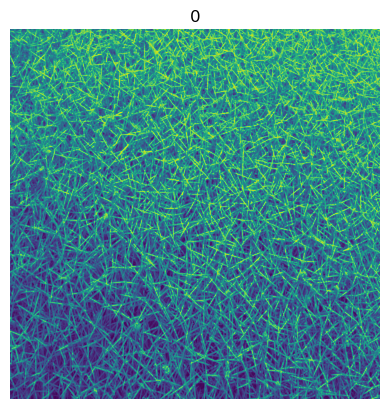

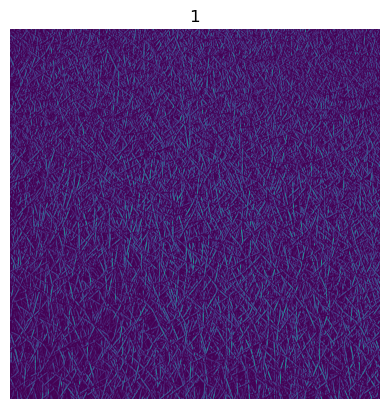

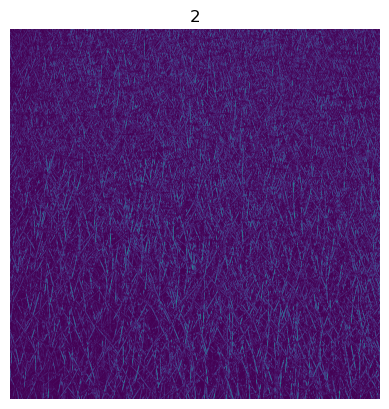

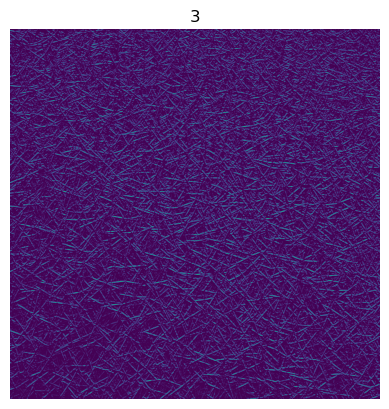

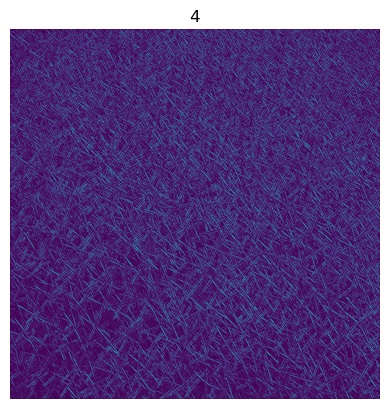

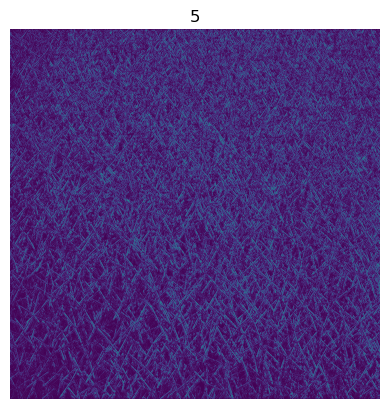

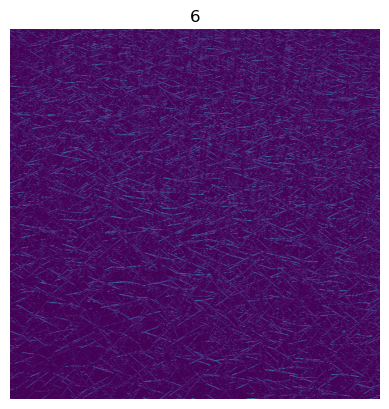

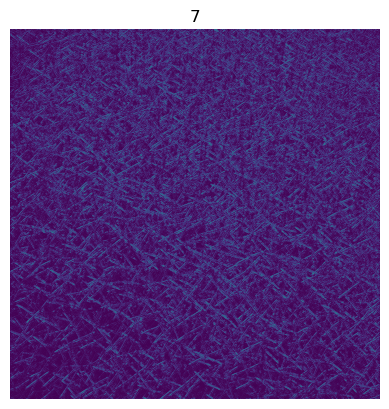

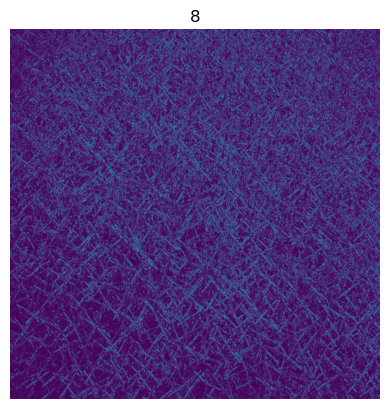

In [9]:
ppp=[]
fff= []
for i in range(9):
    f1 = cv2.filter2D(src=image, ddepth=-1, kernel= laws[i])
    fig.add_subplot(rows, columns, i+1) 
    # showing image
    plt.imshow(f1)
    plt.axis('off')
    plt.title(i)
    plt.show()
    ppp.append(am_power(f1))
    fff.append(f1)

In [10]:
for i in range(9):
    cv2.namedWindow(str(i), cv2.WINDOW_NORMAL)
    cv2.imshow(str(i), ready_2_show( fff[i] ) )

In [11]:
print('original image power= ' , am_power(image) )
for i in range(9):
    print('power of ', i ,'th filter response=', ppp[i] )

original image power=  15998.823437690735
power of  0 th filter response= 14785.399900436401
power of  1 th filter response= 1716.4544563293457
power of  2 th filter response= 1593.0382480621338
power of  3 th filter response= 1241.4806594848633
power of  4 th filter response= 2941.0554037094116
power of  5 th filter response= 3603.031876564026
power of  6 th filter response= 760.3650732040405
power of  7 th filter response= 2342.868248939514
power of  8 th filter response= 3807.8108167648315


In [12]:
cv2.waitKey()
cv2.destroyAllWindows()